# Creating multi-panel figures

You can create yourself multi-panel figures by directly using the underlying Matplotlib objects. We however also provide a simplified way to create such panels by assembling multiple plot or animation objects. This is particularly helpful to create complex animations.

In [1]:
import skimage.io
from microfilm import microplot
from microfilm import microanim

In [2]:
image = skimage.io.imread('../demodata/coli_nucl_ori_ter.tif')

## Micropanel

First we create two microimages that we can adjust as we like

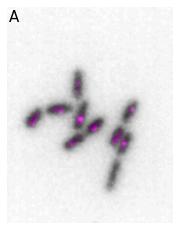

In [3]:
microim1 = microplot.microshow(images=[image[0, 10, :, :], image[1, 10, :, :]],
                               cmaps=['gray', 'pure_magenta'], flip_map=[True, False],
                               label_text='A', label_color='black')

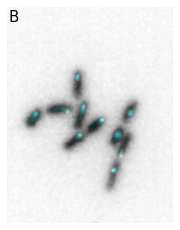

In [4]:
microim2 = microplot.microshow(images=[image[0, 10, :, :], image[2, 10, :, :]],
                               cmaps=['gray', 'pure_cyan'], flip_map=[True, False],
                               label_text='B', label_color='black')

Then we create a Micropanel object as aa grid and just add our two microimages. Those are then exactly reproduced, including annotations in the panels. Note that we can use any option used in ```matplotlib.pyplot.subplots()``` when creating the figure. Also the indices used to place the plots (e.g.g ```pos=0```) are *linear* indices from top left to bottom right.

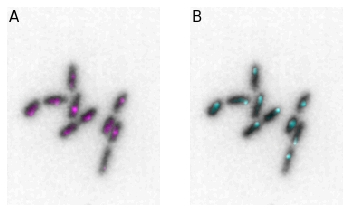

In [7]:
micropanel = microplot.Micropanel(rows=1, cols=2, figsize=(6,4))

micropanel.add_element(pos=0, microim=microim1)
micropanel.add_element(pos=1, microim=microim2)

In the end you can save the panel with the regular ```savefig``` method:

In [8]:
micropanel.savefig('../illustrations/panel.png', bbox_inches = 'tight', pad_inches = 0, dpi=600)

## Micropanel animations

The same principle applies for animations. We first create them separately to have full control over creation and tehn integrate them in the panel.

In [9]:
%matplotlib widget

In [19]:
microanim1 = microanim.Microanim(data=image[[0,1],::], cmaps=['gray', 'pure_magenta'],
                                 flip_map=[True, False], label_text='A', label_color='black')
microanim2 = microanim.Microanim(data=image[[0,2],::], cmaps=['gray', 'pure_cyan'],
                                 flip_map=[True, False], label_text='B', label_color='black')

microanim1.add_time_stamp(unit='T', unit_per_frame='3', location='lower-right', timestamp_color='black')

In [20]:
microanim1.ui

In [21]:
microanim2.ui

In [22]:
animpanel = microanim.Microanimpanel(rows=1, cols=2)
animpanel.add_element(pos=0, microanim=microanim1)
animpanel.add_element(pos=1, microanim=microanim2)

In [23]:
animpanel.ui

Exporting the panel works the same way as for the simple animations. For example the above animation can be saved with:

In [24]:
animpanel.save_movie('../illustrations/panel.gif')

You get access to the underlying objects in the panel via the ```microanims``` parameter. Hence you can still update elements after assembling them. For example you could add a timer:

In [25]:
animpanel.microanims[1].add_time_stamp(unit='T',unit_per_frame=3, location='lower_left', timestamp_color='red')